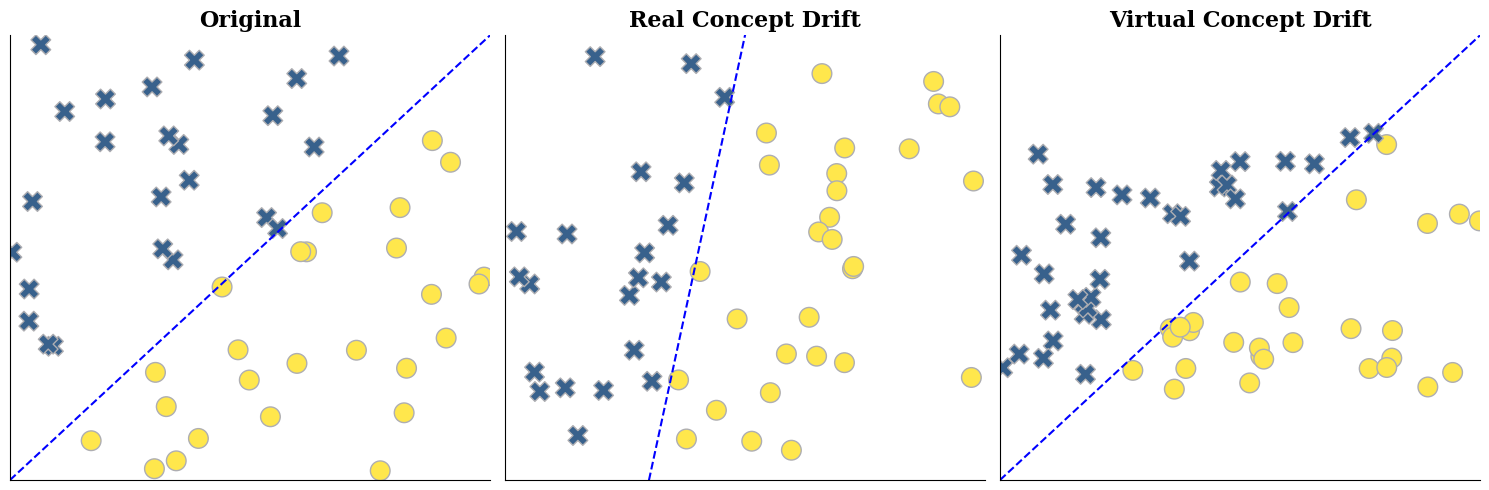

In [19]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import rcParams
from matplotlib import font_manager as fm
# yellow and blue
myColors = ((255/255, 231/255, 76/255), (56/255, 97/255, 140/255))  

rcParams['font.family'] = 'serif'  
rcParams['font.weight'] = 'bold'  

# Create data
def types():
    # Original
    np.random.seed(10)
    df1 = pd.DataFrame(np.random.rand(50, 2), columns=['x', 'y'])
    df1.loc[df1['y'] >= df1['x'], 'class'] = 1
    df1['class'] = df1['class'].fillna(0)

    # Real Concept Drift
    np.random.seed(3)
    df2 = pd.DataFrame(np.random.rand(50, 2), columns=['x', 'y'])
    df2.loc[df2['y'] >= 5 * df2['x'] - 1.5, 'class'] = 1
    df2['class'] = df2['class'].fillna(0)

    # Virtual Concept Drift
    np.random.seed(100)
    df3 = pd.DataFrame(np.random.rand(100, 2), columns=['x', 'y'])
    df3.loc[df3['y'] >= df3['x'], 'class'] = 1
    df3['class'] = df3['class'].fillna(0)
    df3 = df3[(df3['y'] < 0.8) & (df3['y'] > 0.2)]

    return df1, df2, df3

# Plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Original", "Real Concept Drift", "Virtual Concept Drift"]
for i, (v, title) in enumerate(zip(types(), titles)):
    sns.scatterplot(
        data=v,
        x='x', 
        y='y',
        hue='class',
        style='class',
        s=200,
        markers=['o', 'X',], 
        palette=['#ffe74c', '#38618c'],
        edgecolor="#AEAEB2",
        linewidth=1,
        ax=ax[i]
    )
    
    ax[i].set_title(title, fontsize=16, fontweight='bold')
    
    ax[i].set_ylim([0, 1])
    ax[i].set_xlim([0, 1])

    if i == 0:
        ax[i].plot([0, 1], [0, 1], '--', color='blue', linewidth=1.5)  # Original
    elif i == 1:
        ax[i].plot([0, 1], [-1.5, 3.5], '--', color='blue', linewidth=1.5)  # Real Concept Drift
    elif i == 2:
        ax[i].plot([0, 1], [0, 1], '--', color='blue', linewidth=1.5)  # Virtual Concept Drift
    
    ax[i].get_legend().remove()
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_color('black')
    ax[i].spines['bottom'].set_color('black')

plt.tight_layout()
plt.show()

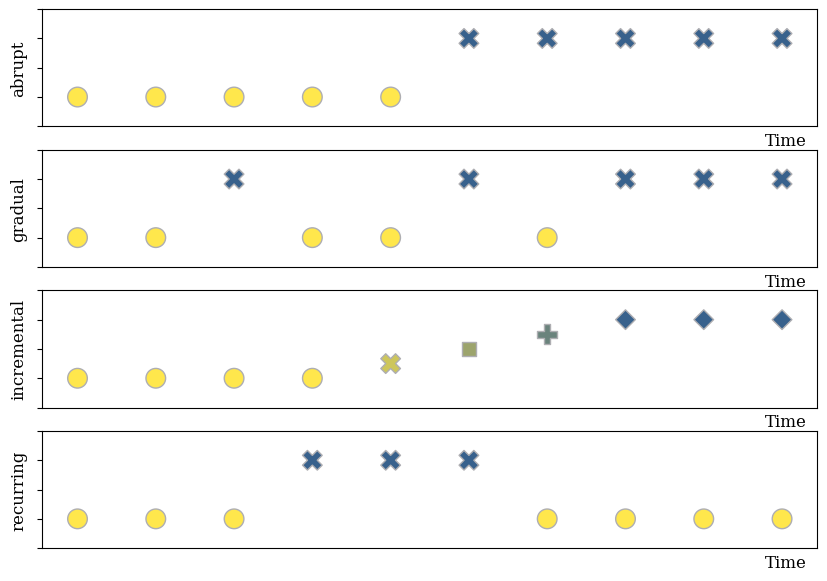

In [9]:
# Create data
def charateristics():
    drift = {'time':list(range(10))*4,'concept':np.zeros(10*4),'char':np.repeat(['abrupt','gradual','incremental','recurring'],10)}
    dt = pd.DataFrame(drift)
    
    ## abrupt
    dt.loc[(dt['char']=='abrupt') & (dt['time'] >= 5) , 'concept'] = 1
    ## gradual
    dt.loc[(dt['char']=='gradual') & (~dt['time'].isin([0,1,3,4,6])) , 'concept'] = 1
    ## incremental
    dt.loc[(dt['char']=='incremental') & (dt['time']>3) , 'concept'] += 0.25
    dt.loc[(dt['char']=='incremental') & (dt['time']>4) , 'concept'] += 0.25
    dt.loc[(dt['char']=='incremental') & (dt['time']>5) , 'concept'] += 0.25
    dt.loc[(dt['char']=='incremental') & (dt['time']>6) , 'concept'] += 0.25
    ## recurring
    dt.loc[(dt['char']=='recurring') & (dt['time'].isin(list(range(3,6)))) , 'concept'] = 1
    return dt
dt = charateristics()

# Plot
fig, ax = plt.subplots(4,1, figsize=(10,7))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, 5)
my_cmap = sns.diverging_palette(220, 20, as_cmap=True)
markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
axis_font = {'fontname':'serif', 'fontsize':12} 
for i, v in enumerate(['abrupt', 'gradual','incremental','recurring']):
    if v != 'incremental':
        sns.scatterplot(data = dt[dt['char']==v], x = 'time', y = 'concept', hue= 'concept', style='concept', s = 200, palette=['#ffe74c','#38618c'], 
                        edgecolor="#AEAEB2",linewidth=1, ax=ax[i])
    else:
        sns.scatterplot(data = dt[dt['char']==v], x = 'time', y = 'concept', hue= 'concept', style='concept', palette=cmap,s = 200, edgecolor="#AEAEB2",linewidth=1, ax=ax[i])
        
    ## y
    
    ax[i].get_legend().remove()
    ax[i].set_ylim([-0.5,1.5])    
    ax[i].set_ylabel(v,**axis_font) 
    ax[i].set_yticklabels([])
    ## x
    ax[i].xaxis.set_ticks([])
    ax[i].set_xlabel("Time",**axis_font)
    ax[i].xaxis.set_label_coords(0.96, -0.05)